# Python Worksheet for Lecture 5

## Newton-Raphson Method in 2D

First import the necessary packages. We'll be working numerically here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Now define our functions of interest:

$$ f(x,y) = \frac{x^2}{2}-\tanh(y),$$

$$ g(x,y) = e^{-y}-y.$$

To determine the number of roots we can use a contour plot of these functions. First set up the 2D grids needed for evaluating the function on the grids.  Then get the functions.

In [2]:
xp = np.arange(-1.5,1.51,0.01)
yp = np.arange(-0.5,2.51,0.01)
X,Y = np.meshgrid(xp,yp)

F = 0.5*X**2 - np.tanh(Y)
G = np.exp(-Y)-Y

We could plot general contours of each function to understand their behaviour. For example:

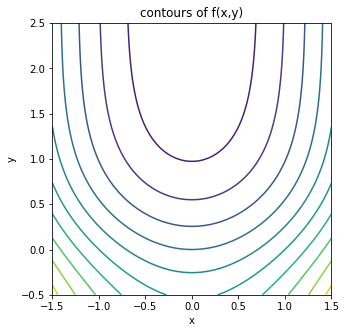

In [3]:
plt.figure(figsize=(5,5))
plt.contour(X,Y,F,levels=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('contours of f(x,y)');

But to find the roots we only need to see where the zero contours intersect.

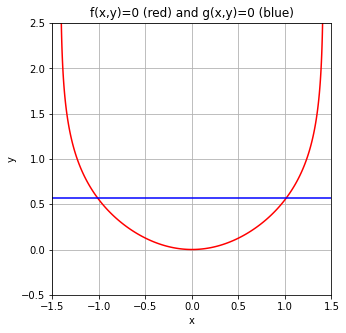

In [4]:
plt.figure(figsize=(5,5))
plt.contour(X,Y,F,levels=[0],colors='r')
plt.contour(X,Y,G,levels=[0],colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x,y)=0 (red) and g(x,y)=0 (blue)')
plt.grid(True);

Now implement the Newton-Raphson scheme. This method could be considerably improved, including via some matrix notation, generic function inputs, stopping conditions, etc.

In [5]:
x = 1.0
y = 0.5
N = 7

print('Our initial guess at the root is x=',x,'y=',y)
for i in range(N):
    x = x - ( x/2-np.tanh(y)/x - (np.exp(-y)-y)/(x*np.cosh(y)**2*(1+np.exp(-y)))  )
    y = y - (y-np.exp(-y))/(1+np.exp(-y))
    print('Then iterate',i+1,'is x=',x,'y=',y)

Our initial guess at the root is x= 1.0 y= 0.5
Then iterate 1 is x= 1.0142672953951584 y= 0.5663110031972182
Then iterate 2 is x= 1.0131722244174488 y= 0.5671431650348622
Then iterate 3 is x= 1.0131714654351005 y= 0.5671432904097811
Then iterate 4 is x= 1.0131714654348125 y= 0.567143290409784
Then iterate 5 is x= 1.0131714654348125 y= 0.5671432904097838
Then iterate 6 is x= 1.0131714654348123 y= 0.5671432904097838
Then iterate 7 is x= 1.0131714654348123 y= 0.5671432904097838


## Euler's Method

First let's define the function on the right hand side of our differential equation:

In [6]:
def f(x,t):
    return x+t;

Write a function that can be used to advance by one time step $h$:

In [7]:
def EulerStep(x,t,h,f):
  k1 = h*f(x,t)
  return x + k1

Decide on the step size to use and on the number of steps to take:

In [8]:
h = 0.2
nsteps = 3

Now make the initial conditions, and also create arrays to put our results into:

In [9]:
x=0.0
t=0.0
xstore = []
tstore = []
xstore.append(x)
tstore.append(t)

Now we advance the solver across our specified number of intervals:

In [10]:
for n in range(nsteps):
  x = EulerStep(x,t,h,f)
  t = t+h
  xstore.append(x)
  tstore.append(t)

The arrays of $t$ and $x$ points are now:

In [11]:
print('The t points are',tstore)
print('and the x points are',xstore)

The t points are [0.0, 0.2, 0.4, 0.6000000000000001]
and the x points are [0.0, 0.0, 0.04000000000000001, 0.12800000000000003]


We can make a plot of the numerical solution obtained:

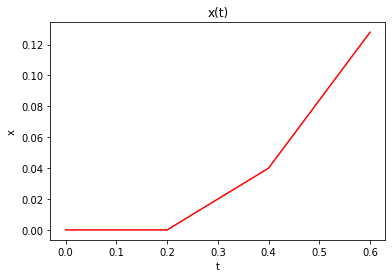

In [12]:
plt.plot(tstore,xstore,'r')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t)')
plt.show()

Perhaps we want to compare this with the analytical solution $x(t)=e^t-t-1$.  
Of course in Python we'd need to evaluate that on a numerical grid.

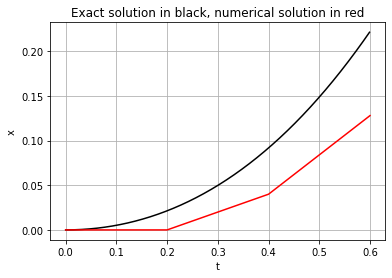

In [13]:
t_exact = np.arange(0.0,0.6,0.001)

plt.plot(t_exact,np.exp(t_exact)-t_exact-1,color='k')
plt.plot(tstore,xstore,'r')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Exact solution in black, numerical solution in red')

plt.grid(True)